<a href="https://colab.research.google.com/github/collares22/DSfut/blob/main/Projeto_1_Brasileir%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
#Importando todas as bibliotecas que serão usadas para construir o modelo de predição baseado em Sklearn

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression #estudar 
from sklearn.tree import DecisionTreeClassifier #estudar
from sklearn.naive_bayes import GaussianNB #estudar
from sklearn.svm import SVC #estudas
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score #estudar
from sklearn.feature_selection import SelectKBest #estudar 
from sklearn.model_selection import GridSearchCV #estudar 
from sklearn.preprocessing import StandardScaler, MinMaxScaler #estudar
from IPython.display import display #para visualizar os dados em tabelas
import matplotlib.pyplot as plt #para visualizar os dados em tabelas
import seaborn as StandardScaler #para visualizar os dados em tabelas
from sklearn.preprocessing import MinMaxScaler #para visualizar os dados em tabelas
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline


In [136]:
df=pd.read_csv("/content/BRAV3.CSV",sep=";") #importei os dados usando o pandas

In [137]:
df=df.dropna()

In [138]:
display(df.head()) #Visualizar os dados no python

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PE,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,0,1.76,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [139]:
#Notas do dataset de futebol

#Country = país do campeonato
#League = nome da liga
#game_id = id do jogo
#Season = temporada
#date = data do jogo
#Time = hora do jogo
#Home = Time da casa
#home_id = id do time da casa
#Away = time visitante
#Away_id =  id do time visitante
#HG = Gols do time da casa
#AG = Gols do time visitante
#Res = Resultado do jogo (D=Draw, H=Home win, A=Away win)
#PH = probablidade vitória time da casa provida pela Pinacle (casa de aposta inglesa)
#PE = probablidade empate provida pela Pinacle (casa de aposta inglesa)
#PA = probablidade vitória time visitante provida pela Pinacle (casa de aposta inglesa)
#MaxH = probablidade vitória time da casa provida pela OddsPortal (casa de aposta inglesa)
#MaxD = probablidade empate provida pela OddsPortal (casa de aposta inglesa)
#MaxA = probablidade vitória time visitante provida pela OddsPortal (casa de aposta ingles
#AvgH = probablidade média de vitória em casa provida pela OddsPortal (casa de aposta inglesa)
#AvgD = probablidade média de empate provida pela OddsPortal (casa de aposta inglesa)
#AvgA = probablidade média de vitória pelo time visitante provida pela OddsPortal (casa de aposta inglesa)

In [140]:
#Explorando os dados
#Base de dados do Brasileirão de 2012 a 2021
#shape é uma função do pandas que mostra as colunas e linhas da tabela

matches=df.shape[0] #estudar

features=df.shape[1] -1  #retira a coluna resultados

home_wins=len(df[df.Res==1]) #aqui ele vai contar os dados respectivos de Vitoria do mandante
away_wins=len(df[df.Res==2]) #Aqui ele vai contar os dados respectivos de vitorias do visitantes
draw=len(df[df.Res==0]) #Aqui ele vai contar os dados respectivos de empates
val=[home_wins,away_wins,draw] #aqui eu criei uma variavel contendo todos os dados de vitorias dos mandantes, visitantes e dos empates

win_rate=(float(home_wins)/(matches))*100 #aqui é feito a conversão dos dados brutos em porcentagens

print("Total de jogos",matches)
print("total de colunas:",features)
print("total de jogos ganhos em casa",home_wins)
print("Total de jogos ganhos dos visitantes",away_wins)
print("Total de jogos empatados",draw)
print("Percentual de jogos ganhos em casa: {:.2f}%".format(win_rate))

#O argumento casa é  importante para prever o resultado.


Total de jogos 3706
total de colunas: 18
total de jogos ganhos em casa 1807
Total de jogos ganhos dos visitantes 897
Total de jogos empatados 1002
Percentual de jogos ganhos em casa: 48.76%


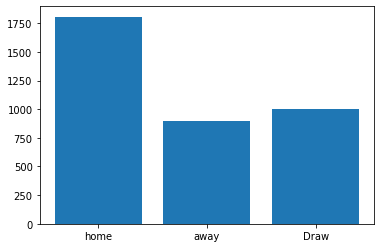

In [141]:
#Visualização dos resultados dos jogos

x=np.arange(3)
plt.bar(x,val)
plt.xticks(x,("home","away","Draw"))
plt.show()

In [142]:
#Preparando os dados

#Deixando só as variaveis numericas

num_df=df.drop(["Country","League","Season","Date","Time","Home","Away"],1)

display(num_df.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,HG,AG,Res,PH,PE,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.0,1.0,0,1.76,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [143]:
#Separar as features
features=num_df.drop(["Res"],1)

#Separar as labels
labels=num_df["Res"]

print("Features")
print(features.head())

print("=========")

print("labels")
print(labels.head())

Features
    HG   AG    PH    PE    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
0  1.0  1.0  1.76  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90
1  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58
2  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64
3  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84
4  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89
labels
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [144]:
df=df.dropna()
df.shape

(3706, 19)

In [145]:
#escolhendo as melhores features com Kbest

features_list = ('HG','AG','PH','PE','PA','MaxH','MaxD','MaxA','AvgH','AvgD','AvgA')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features,labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ("")
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'AG': 1232.4092047823767, 'PH': 1186.3018320506708, 'PE': 149.52084584452467, 'AvgD': 145.30083996338516, 'MaxH': 133.82143868285397, 'AvgH': 132.89215942897417, 'MaxD': 130.51757346185278, 'MaxA': 69.56681529582592, 'AvgA': 68.86663959538893, 'PA': 67.49452616031172}


In [146]:
#separa as features com base nos melhores features para treinamento
features=df.drop(["Res","Home","Away","Time","Season","Date","League","Country",],1)#retirei as colunas 


#Separa as labels para treinamento
labels=df["Res"]

print("Features")
print(features.head())

print("==========")


print("Labels")
print(labels.head())

Features
    HG   AG    PH    PE    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
0  1.0  1.0  1.76  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90
1  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58
2  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64
3  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84
4  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89
Labels
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [147]:
#Normalizando os dados de entrada (features)

#gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale=scaler.transform(features)

print("Features: ",features_scale.shape)
print(features_scale)

Features:  (3706, 11)
[[0.16666667 0.16666667 0.04096386 ... 0.03235908 0.11913357 0.14746363]
 [0.16666667 0.16666667 0.10542169 ... 0.07933194 0.0866426  0.0562328 ]
 [0.33333333 0.16666667 0.0313253  ... 0.02713987 0.13959085 0.17656311]
 ...
 [0.33333333 0.         0.08373494 ... 0.07098121 0.04091456 0.0833661 ]
 [0.16666667 0.         0.08975904 ... 0.07463466 0.05535499 0.07392843]
 [0.16666667 0.         0.01807229 ... 0.01565762 0.24548736 0.29256783]]


In [148]:
#Treinando e fazendo teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(features_scale,labels, test_size=0.33, random_state=42, shuffle=False)

In [149]:
print(X_train.shape)

(2483, 11)


In [150]:
X_test.shape

(1223, 11)

In [151]:
#print ('LogisticRegression')


#clf_LR = LogisticRegression(multi_class='multinomial',max_iter=200)
#clf_LR.fit(X_train, Y_train)
#pred= clf_LR.predict(X_test)

#lg_acc = accuracy_score(Y_test, pred)
#f1=f1_score(Y_test,pred,average = 'micro')
#print ('Acurácia LogisticRegression:{}'.format(lg_acc))
#print ('F1 Score:{}'.format(f1) )

In [152]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] }
#search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

#search.fit(X_train,Y_train)
#clf = search.best_estimator_
#pred= clf.predict(X_test)
#lg_acc = accuracy_score(Y_test, pred)


#f1=f1_score(Y_test,pred,average = 'macro')

#print ('Acurácia LogisticRegression:{}'.format(lg_acc))
#print ('F1 Score:{}'.format(f1) )

#print (clf)

In [153]:
#Treinando e testando os modelos
print ('Decision Tree')


clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
pred= clf.predict(X_test)

dt_acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred, average='macro')
print ('Acurácia Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Decision Tree
Acurácia Tree:0.9991823385118561
F1 Score:0.9989793544883897


In [154]:
#Testando Decision tree hyper parameters
print ('Decision Tree')

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    
  
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid)

search.fit(X_train,Y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
dt_acc = accuracy_score(Y_test, pred)


f1=f1_score(Y_test,pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)


Decision Tree
Acurácia Decision Tree:0.9304987735077678
F1 Score:0.9304987735077678
DecisionTreeClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=8)


In [155]:
#report = classification_report(Y_test,pred)
#print(report)

In [156]:
import pickle #estuda
pickle.dump(clf,open("Modelo_BR_PREDICT_30032022","wb"))

In [157]:
X_test[0]

array([0.16666667, 0.        , 0.13313253, 0.12358393, 0.03552585,
       0.08276603, 0.11448835, 0.06111111, 0.10960334, 0.11672684,
       0.03971687])

In [158]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import classification_report
#xgb = GradientBoostingClassifier(
#    max_depth= 110,
#    verbose = 3,
#    learning_rate = 0.1,
#    n_estimators = 2,
#    criterion = 'squared_error',
#    max_features = None,
#    n_iter_no_change = 10,
#    min_samples_leaf= 3,
#    min_samples_split= 8,
#)
    
#xgb.fit(X_train,Y_train)
#predXGB = xgb.predict(X_test)


In [159]:
#report = classification_report(Y_test,predXGB)
#print(report)

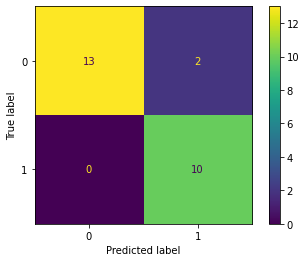

In [161]:
X, Y = make_classification(random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state=42)
clf = SVC(random_state=42)
clf.fit(X_train, Y_train)
SVC(random_state=42)
predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()